# Regressão 01 - tarefa 03 - transformações em X e Y

In [2]:
# Carregando pacotes
import pandas as pd
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando a base e criando as variáveis
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

### 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.

In [5]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

### 2. Remova as variáveis não significantes. 

In [6]:
# PARTE 1: Avaliando significância:
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
No. Observations:                 244   F-statistic:                     30.13
Covariance Type:            nonrobust   Prob (F-statistic):           2.64e-20
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resposta: Vemos no summary que nem 'sex', nem 'smoker', nem 'time' tem P>|t| abaixo de 5%, ou seja, nenhuma delas é estatisticamente significante.

In [7]:
# PARTE 2: Removendo as variáveis não siginificantes.
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg =  sm.OLS(y,X).fit()

### 3. observe o gráfico de resíduos em função de ```net_bill``` 

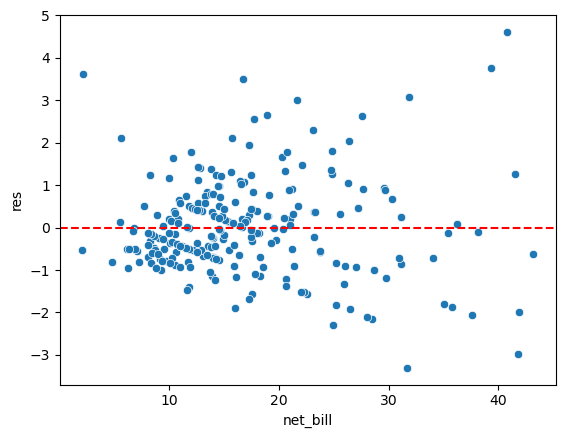

In [8]:
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [9]:
#PARTE 1: transformando em log
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
No. Observations:                 244   F-statistic:                     101.0
Covariance Type:            nonrobust   Prob (F-statistic):           4.40e-20
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#PARTE 2: transformando em polinomio
y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
No. Observations:                 244   F-statistic:                     60.55
Covariance Type:            nonrobust   Prob (F-statistic):           4.96e-22
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
=========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Resposta: Entre os dois modelos, o polinômio é melhor, pois possui o R-quared de maior valor.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### 1.Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [11]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

### 2.Remova as variáveis não significantes.

In [12]:
# PARTE 1: Avaliando significância:
reg =  sm.OLS(y,X).fit()
R21 = reg.rsquared
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
No. Observations:                 244   F-statistic:                     27.25
Covariance Type:            nonrobust   Prob (F-statistic):           1.21e-18
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resposta: Vemos no summary que nem 'sex', nem 'smoker', nem 'time' tem P>|t| abaixo de 5%, ou seja, nenhuma delas é estatisticamente significante.

In [13]:
# PARTE 2: Removendo as variáveis não siginificantes.
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg =  sm.OLS(y,X).fit()

### 3.Observe o gráfico de resíduos em função de net_bill

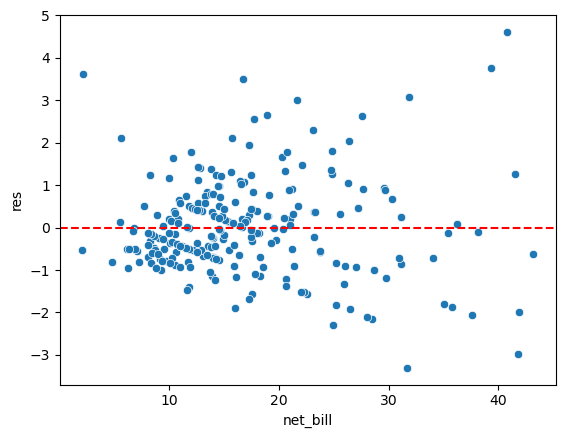

In [14]:
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 4.Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [15]:
#PARTE 1: transformando em log
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
No. Observations:                 244   F-statistic:                     113.5
Covariance Type:            nonrobust   Prob (F-statistic):           5.62e-22
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#PARTE 2: transformando em polinômio
y, X = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill,2)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 244   F-statistic:                     61.39
Covariance Type:            nonrobust   Prob (F-statistic):           2.82e-22
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
=========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Entre os dois modelos, o polinômio é melhor, pois possui o R-quared de maior valor.

### 5.Do modelo final deste item, calcule o  𝑅2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [22]:
# Calculo R2 na escala de tip (sem log)
tips['pred_y'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_y', 'tip']].corr().iloc[0,1]**2
tips[['pred_y', 'tip']].corr().iloc[0,1]

# Retornando o resultado
print("O R2 do modelo final é {:.2%}, enquanto o R2 do modelo do item 1 é {:.2%}".format(r2,R21))

if r2 > R21:
    print("Sendo assim, o melhor modelo é o modelo final.")
else:
    print("Sendo assim, o melhor modelo é o modelo do item 1.")

O R2 do modelo final é 32.91%, enquanto o R2 do modelo do item 1 é 31.32%
Sendo assim, o melhor modelo é o modelo final.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [23]:
df = pd.read_csv('previsao_de_renda.csv')

### 1.Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [25]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()

### 2.Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

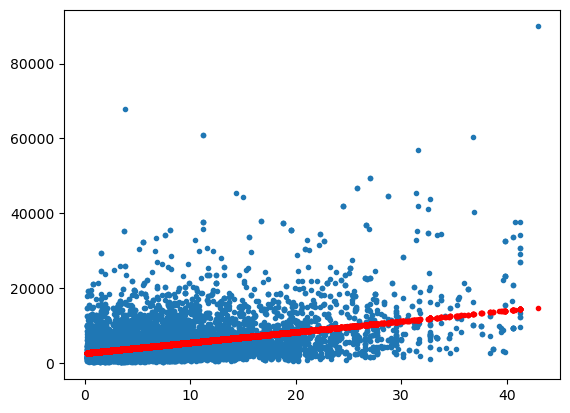

In [26]:
# Visualizando a plotagem do gráfico:
df['renda_pred'] = reg.fittedvalues
plt.plot(df['tempo_emprego'], df['renda'], '.') #distribuição real
plt.plot(df['tempo_emprego'], df['renda_pred'], 'r.') #distribuição prevista
r21 = reg.rsquared

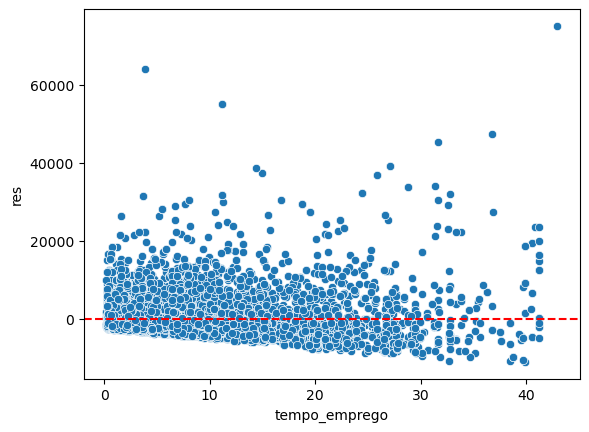

In [27]:
# Visualizando a plotagem dos resíduos:
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

Resposta: Eu faria a adição de novas variáveis que pudessem explicar o porque alguns resíduos se encontram acima de zero no início e abaixo de zero no final.

### 3.Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis

In [28]:
reg = smf.ols('''renda ~ tempo_emprego + data_ref 
                + posse_de_veiculo + posse_de_imovel 
                + qtd_filhos + tipo_renda + educacao 
                + estado_civil + tipo_residencia
                + idade + qt_pessoas_residencia''', data = df).fit()

### 4.Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [29]:
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
No. Observations:               12466   F-statistic:                     72.08
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2082.4982   1727.392      1.206      0.228   -1303.457    5468.454
data_ref[T.2015-02-01]             -36.5588    217.097     -0.168      0.866    -462.102     388.984
data_ref[T.2015-03-01]             -48.2609    216.873     -0.223      0.824    -473.365     376.843
data_ref[T.2015-04-01]             -46.8637    217.465     -0.215      0.829    -473.129     379.402
data_ref[T.2015-05-01]            -206.8668    215.662     -0.959      0.337    -629.597     215.864
data_ref[T.2015-06-01]              -7.9933    217.754     -0.037      0.971    -434.824     418.838
data_ref[T.2015-07-01]            -105.6764    217.962     -0.485      0.628    -532.915     321.563
data_ref[T.2015-08-01]            -313.5107    218.173     -1.437      0.151    -741.164     114.143
data_ref[T.2015-09-01]            -264.2727    217.252     -1.216      0.224    -690.120     161.575
data_ref[T.2015-10-01]             -51.8004    216.668     -0.239      0.811    -476.503     372.902
data_ref[T.2015-11-01]            -194.5053    216.825     -0.897      0.370    -619.516     230.505
data_ref[T.2015-12-01]            -437.0979    217.083     -2.014      0.044    -862.615     -11.581
data_ref[T.2016-01-01]            -313.4461    216.759     -1.446      0.148    -738.328     111.436
data_ref[T.2016-02-01]              45.2440    216.889      0.209      0.835    -379.893     470.381
data_ref[T.2016-03-01]             156.2188    217.094      0.720      0.472    -269.319     581.756
posse_de_veiculo[T.True]           663.6730     82.394      8.055      0.000     502.169     825.177
posse_de_imovel[T.True]            294.9785     85.822      3.437      0.001     126.754     463.203
tipo_renda[T.Bolsista]           -1180.5768   2218.452     -0.532      0.595   -5529.087    3167.933
tipo_renda[T.Empresário]           937.0858     92.699     10.109      0.000     755.382    1118.790
tipo_renda[T.Pensionista]         1632.3961   1479.305      1.103      0.270   -1267.271    4532.063
tipo_renda[T.Servidor público]     252.1721    134.205      1.879      0.060     -10.891     515.235
educacao[T.Pós graduação]         1217.2624   1111.946      1.095      0.274    -962.324    3396.849
educacao[T.Secundário]            -580.1636    450.253     -1.289      0.198   -1462.728     302.401
educacao[T.Superior completo]     -120.3813    452.044     -0.266      0.790   -1006.457     765.694
educacao[T.Superior incompleto]   -717.2187    484.268     -1.481      0.139   -1666.458     232.021
estado_civil[T.Separado]          -290.4307    829.618     -0.350      0.726   -1916.611    1335.750
estado_civil[T.Solteiro]           125.8582    814.462      0.155      0.877   -1470.613    1722.330
estado_civil[T.União]             -280.8257    147.699     -1.901      0.057    -570.340       8.688
estado_civil[T.Viúvo]             -775.9543    851.538     -0.911      0.362   -2445.101     893.193
tipo_residencia[T.Casa]           -726.6027    337.859     -2.151      0.032   -1388.858     -64.347
tipo_residencia[T.Com os pais]   -1023.6473    378.893     -2.702      0.007   -1766.337    -280.958
tipo_residencia[T.Comunitário]    -846.1455 

In [30]:
# Reajustando apenas com variáveis significantes
reg = smf.ols('''renda ~ tempo_emprego + posse_de_veiculo 
                + (tipo_renda == "Empresário")
                + (estado_civil == "União")
                + qtd_filhos + idade
                + qt_pessoas_residencia'''
              , data = df).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
No. Observations:               12466   F-statistic:                     364.4
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            908.9772    263.466      3.450      0.001     392.543    1425.412
posse_de_veiculo[T.True]             711.9789     82.102      8.672      0.000     551.045     872.912
tipo_renda == "Empresário"[T.True]   950.0844     90.663     10.479      0.000     772.370    1127.798
estado_civil == "União"[T.True]     -329.6333    147.408     -2.236      0.025    -618.575     -40.692
tempo_emprego                        286.3027      6.240     45.882      0.000     274.071     298.534
qtd_filhos                          -100.3199    121.653     -0.825      0.410    -338.780     138.140
idade                                 18.9745      4.701      4.037      0.000       9.761      28.188
qt_pessoas_residencia                205.9923    101.938      2.021      0.043       6.178     405.806
======================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observações:
Os parâmetros (tipo_residencia == "Casa") e era estatisticamente significantes no modelo acima. Porém, ao reduzir a quantidade de variáveis ele se tornaram estatisticamente insignificantes, e foram removidos por isso. O fenômeno oposto aconteceu com "qtd_filhos" e "qt_pessoas_residência", que eram estatisticamente insignificantes no modelo acima. Porém, com a retirada de outras variáveis, se tornaram estatisticamente significantes.

Interpretações:
Podemos interpretar os quoeficientes da seguinte forma:

- Intercept é o valor da renda estimado se todas as variáveis teoricamente fosse a zero (o que é impossível pois idade não pode ser zero neste caso). Este valor é negativo em 1141,16 .

Variáveis Categóricas

- Se a pessoa tiver um carro, isso adiciona 1912,60 na renda estimada dela.
- Se a pessoa for empresária, isso adiciona 570,10 na renda estimada dela.
- Se a pessoa tiver uma união estável, isso diminui 914,09 na renda estimada dela.

Variáveis Numéricas

- Para cada ano de tempo de emprego a pessoa adiciona 519,10 na renda estimada dela.
- Para cada filho a pessoa diminui 618,53 na renda estimada dela.
- Para cada ano de vida na idade da pessoa, ela adiciona 18,43 na renda estimada dela.
- Para cada pessoa morando na sua residência a pessoa adiciona 830,56 na renda estimada dela.

### 5.Faça uma análise de resíduos. Avalie a qualidade do ajuste.

<Axes: xlabel='posse_de_veiculo', ylabel='res'>

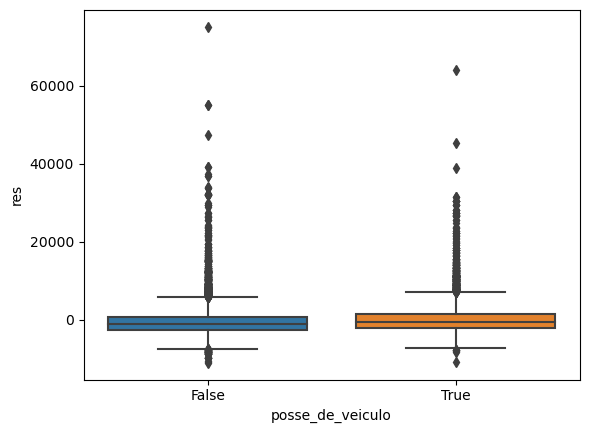

In [31]:
sns.boxplot(x = 'posse_de_veiculo', y = 'res', data = df)

<Axes: xlabel='is_empresario', ylabel='res'>

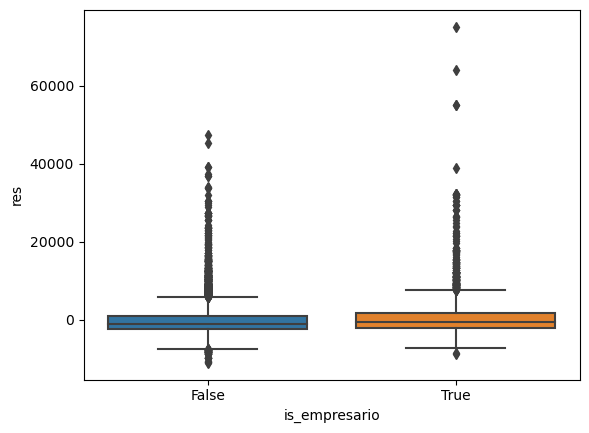

In [32]:
df['is_empresario'] = df['tipo_renda'] == 'Empresário'
sns.boxplot(x = 'is_empresario', y = 'res', data = df)

<Axes: xlabel='is_uniao', ylabel='res'>

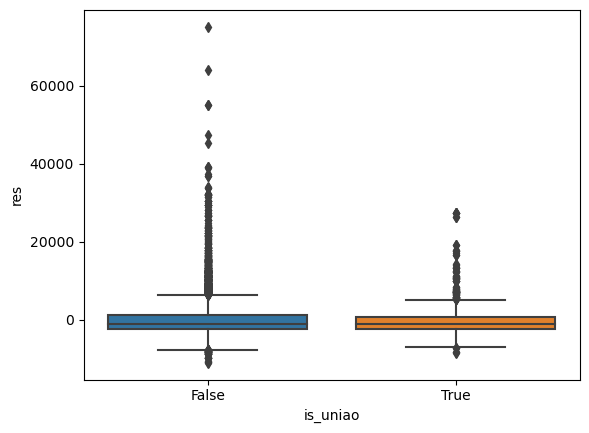

In [33]:
df['is_uniao'] = df['estado_civil'] == 'União'
sns.boxplot(x = 'is_uniao', y = 'res', data = df)

Numéricas

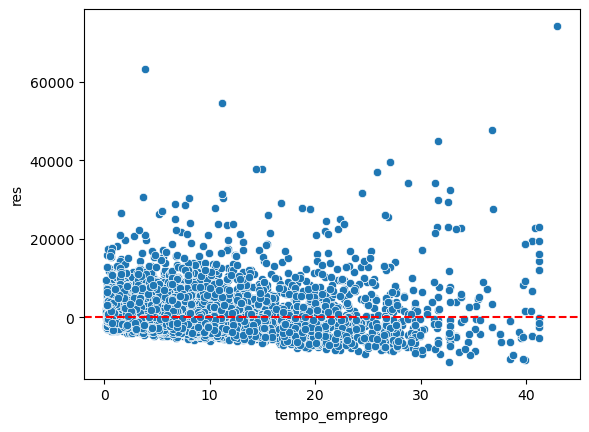

In [34]:
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

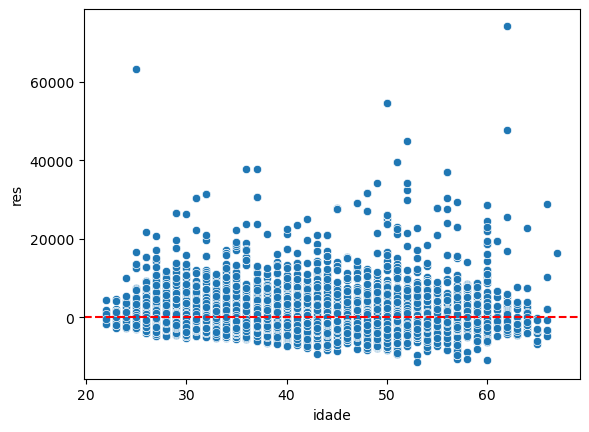

In [35]:
sns.scatterplot(x = 'idade', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='qtd_filhos', ylabel='res'>

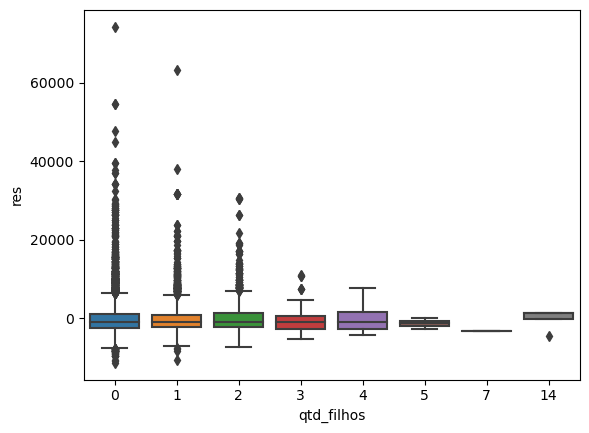

In [36]:
sns.boxplot(x = 'qtd_filhos', y = 'res', data = df)

<Axes: xlabel='qt_pessoas_residencia', ylabel='res'>

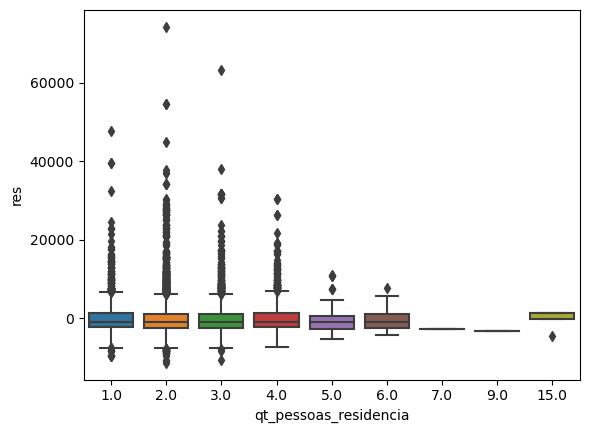

In [37]:
sns.boxplot(x = 'qt_pessoas_residencia', y = 'res', data = df)

Avaliação:

O ajuste está bem realizado. Podemos concluir isso, pois nos gráficos gerados em box-plot não temos nenhum valor das variáveis se destacando dos outros (desconsiderando os valores outliers) e nos gráficos de dispersão observamos um movimento similar (especialmente no gráfico de idade), mais uma vez, desconsiderando os outliers.